In [3]:
stock_prices.head()

Date          Open          High           Low         Close  \
0  2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   
1  2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
2  2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   
3  2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703   
4  2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234   

      Volume     Adj Close  
0   82160000  17949.369141  
1  133030000  17929.990234  
2  106380000  17694.679688  
3  112190000  17409.720703  
4  138740000  17140.240234

In [ ]:
combined_df.head(3)

Date  Label                                               Top1  \
0  2008-08-08      0  b"Georgia 'downs two Russian warplanes' as cou...   
1  2008-08-11      1  b'Why wont America and Nato help us? If they w...   
2  2008-08-12      0  b'Remember that adorable 9-year-old who sang a...   

                                          Top2  \
0      b'BREAKING: Musharraf to be impeached.'   
1  b'Bush puts foot down on Georgian conflict'   
2           b"Russia 'ends Georgia operation'"   

                                                Top3  \
0  b'Russia Today: Columns of troops roll into So...   
1  b"Jewish Georgian minister: Thanks to Israeli ...   
2  b'"If we had no sexual harassment we would hav...   

                                                Top4  \
0  b'Russian tanks are moving towards the capital...   
1  b'Georgian army flees in disarray as Russians ...   
2  b"Al-Qa'eda is losing support in Iraq because ...   

                                                Top5  \
0  b"Afghan children raped with 'impunity,' U.N. ...   
1      b"Olympic opening ceremony fireworks 'faked'"   
2  b'Ceasefire in Georgia: Putin Outmaneuvers the...   

                                                Top6  \
0  b'150 Russian tanks have entered South Ossetia...   
1  b'What were the Mossad with fraudulent New Zea...   
2  b'Why Microsoft and Intel tried to kill the XO...   

                                                Top7  \
0  b"Breaking: Georgia invades South Ossetia, Rus...   
1  b'Russia angered by Israeli military sale to G...   
2  b'Stratfor: The Russo-Georgian War and the Bal...   

                                                Top8  ...  \
0  b"The 'enemy combatent' trials are nothing but...  ...   
1  b'An American citizen living in S.Ossetia blam...  ...   
2  b"I'm Trying to Get a Sense of This Whole Geor...  ...   

                                               Top16  \
0  b'Georgia Invades South Ossetia - if Russia ge...   
1  b'Israel and the US behind the Georgian aggres...   
2  b'U.S. troops still in Georgia (did you know t...   

                                               Top17  \
0                b'Al-Qaeda Faces Islamist Backlash'   
1  b'"Do not believe TV, neither Russian nor Geor...   
2       b'Why Russias response to Georgia was right'   

                                               Top18  \
0  b'Condoleezza Rice: "The US would not act to p...   
1  b'Riots are still going on in Montreal (Canada...   
2  b'Gorbachev accuses U.S. of making a "serious ...   

                                               Top19  \
0  b'This is a busy day:  The European Union has ...   
1    b'China to overtake US as largest manufacturer'   
2         b'Russia, Georgia, and NATO: Cold War Two'   

                                               Top20  \
0  b"Georgia will withdraw 1,000 soldiers from Ir...   
1                     b'War in South Ossetia [PICS]'   
2  b'Remember that adorable 62-year-old who led y...   

                                               Top21  \
0  b'Why the Pentagon Thinks Attacking Iran is a ...   
1  b'Israeli Physicians Group Condemns State Tort...   
2          b'War in Georgia: The Israeli connection'   

                                               Top22  \
0  b'Caucasus in crisis: Georgia invades South Os...   
1  b' Russia has just beaten the United States ov...   
2  b'All signs point to the US encouraging Georgi...   

                                               Top23  \
0  b'Indian shoe manufactory  - And again in a se...   
1  b'Perhaps *the* question about the Georgia - R...   
2  b'Christopher King argues that the US and NATO...   

                                               Top24  \
0  b'Visitors Suffering from Mental Illnesses Ban...   
1                 b'Russia is so much better at war'   
2                        b'America: The New Mexico?'   

                                               Top25  
0           b"No Help for Mexico's Kidnapping Surge"  
1 

In [4]:
# For task evaluation, please use data from 2008-08-08 to 2014-12-31 as Training Set, and
# Test Set is then the following two years data (from 2015-01-02 to 2016-07-01).
# This is roughly a 80%/20% split.

In [5]:
# label - indicator (0 or 1): 0 = DJIA decreased, 1 = DJIA increased. DJIA : Stock
import re
combined_df.head()

news_columns = [f'Top{i}' for i in range(1, 26)] # Since Top25 as last col + date col

# || marks a new headlines and removes b' or b" or b\ instead.
combined_df['Combined_Hlines'] = combined_df[news_columns].apply(lambda x: ' || '.join(x.astype(str)), axis=1)
combined_df['Combined_Hlines'] = combined_df['Combined_Hlines'].apply(lambda x: re.sub(r"b[\"']", '', x))
combined_df['Combined_Hlines'] = combined_df['Combined_Hlines'].apply(lambda x: x.replace("\\'", "'"))

def clean_text(text):
    # Remove backslash-escaped single quotes and double quotes
    return re.sub(r"[\'\"]", '', text)

combined_df['Combined_Hlines'] = combined_df['Combined_Hlines'].apply(clean_text)

combined_df_copy = combined_df.copy()
# deleting unnecessary columns since I sucessfully merged columns
combined_df_copy.drop(columns=news_columns, inplace=True)

In [6]:
combined_df_copy

Date  Label                                    Combined_Hlines
0     2008-08-08      0  Georgia downs two Russian warplanes as countri...
1     2008-08-11      1  Why wont America and Nato help us? If they won...
2     2008-08-12      0  Remember that adorable 9-year-old who sang at ...
3     2008-08-13      0   U.S. refuses Israel weapons to attack Iran: r...
4     2008-08-14      1  All the experts admit that we should legalise ...
...          ...    ...                                                ...
1984  2016-06-27      0  Barclays and RBS shares suspended from trading...
1985  2016-06-28      1  2,500 Scientists To Australia: If You Want To ...
1986  2016-06-29      1  Explosion At Airport In Istanbul || Yemeni for...
1987  2016-06-30      1  Jamaica proposes marijuana dispensers for tour...
1988  2016-07-01      1  A 117-year-old woman in Mexico City finally re...

[1989 rows x 3 columns]

In [7]:
combined_df_copy['Combined_Hlines'].tolist()

['Georgia downs two Russian warplanes as countries move to brink of war || BREAKING: Musharraf to be impeached. || Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube) || Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire || Afghan children raped with impunity, U.N. official says - this is sick, a three year old was raped and they do nothing || 150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets. || Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SOs side || The enemy combatent trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it. || Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO] || Did the U.S. Prep Georgia for War with Russia? || Rice Gives Green Light f

In [8]:
combined_df_copy.head()

Date  Label                                    Combined_Hlines
0  2008-08-08      0  Georgia downs two Russian warplanes as countri...
1  2008-08-11      1  Why wont America and Nato help us? If they won...
2  2008-08-12      0  Remember that adorable 9-year-old who sang at ...
3  2008-08-13      0   U.S. refuses Israel weapons to attack Iran: r...
4  2008-08-14      1  All the experts admit that we should legalise ...

In [10]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

combined_df_copy['Tokenized_Hlines'] = combined_df_copy['Combined_Hlines'].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
combined_df_copy["Tokenized_Hlines"] = combined_df_copy["Tokenized_Hlines"].apply(lambda x: [word for word in x
                                                                                             if word.lower() not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
combined_df_copy

Date  Label                                    Combined_Hlines  \
0     2008-08-08      0  Georgia downs two Russian warplanes as countri...   
1     2008-08-11      1  Why wont America and Nato help us? If they won...   
2     2008-08-12      0  Remember that adorable 9-year-old who sang at ...   
3     2008-08-13      0   U.S. refuses Israel weapons to attack Iran: r...   
4     2008-08-14      1  All the experts admit that we should legalise ...   
...          ...    ...                                                ...   
1984  2016-06-27      0  Barclays and RBS shares suspended from trading...   
1985  2016-06-28      1  2,500 Scientists To Australia: If You Want To ...   
1986  2016-06-29      1  Explosion At Airport In Istanbul || Yemeni for...   
1987  2016-06-30      1  Jamaica proposes marijuana dispensers for tour...   
1988  2016-07-01      1  A 117-year-old woman in Mexico City finally re...   

                                       Tokenized_Hlines  
0     [Georgia, downs, two, Russian, warplanes, coun...  
1     [wont, America, Nato, help, us, ?, wont, help,...  
2     [Remember, adorable, 9-year-old, sang, opening...  
3     [U.S., refuses, Israel, weapons, attack, Iran,...  
4     [experts, admit, legalise, drugs, ||, War, Sou...  
...                                                 ...  
1984  [Barclays, RBS, shares, suspended, trading, ta...  
1985  [2,500, Scientists, Australia, :, Want, Save, ...  
1986  [Explosion, Airport, Istanbul, ||, Yemeni, for...  
1987  [Jamaica, proposes, marijuana, dispensers, tou...  
1988  [117-year-old, woman, Mexico, City, finally, r...  

[1989 rows x 4 columns]

In [13]:
# Applying Lemmatization technique
# Lemmatization: provides different forms of a word eg) (eats, eating) are treated as the same token.
# Preq for TF-IDF technique

In [14]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()
combined_df_copy['Lemmatization_Hlines'] = combined_df_copy['Tokenized_Hlines'].apply(lambda x:  [lemmatizer.lemmatize(x) for x in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [15]:
# comparison_df = combined_df_copy[['Date', 'Tokenized_Hlines', 'Lemmatization_Hlines']].head(10)
# for index, row in comparison_df.iterrows():
#     print(f"Date: {row['Date']}")
#     print(f"Tokenized: {row['Tokenized_Hlines']}")
#     print(f"Lemmatization: {row['Lemmatization_Hlines']}")

# Compare Tokenized_Hlines and Lemmatization_Hlines
def compare_tokens(original, lemmatized):
    differences = [(x, y) for x, y in zip(original, lemmatized) if x != y]
    return differences

combined_df_copy['Differences'] = combined_df_copy.apply(lambda row: compare_tokens(
    row['Tokenized_Hlines'], row['Lemmatization_Hlines']), axis=1
)

In [16]:
combined_df_copy.tail()

Date  Label                                    Combined_Hlines  \
1984  2016-06-27      0  Barclays and RBS shares suspended from trading...   
1985  2016-06-28      1  2,500 Scientists To Australia: If You Want To ...   
1986  2016-06-29      1  Explosion At Airport In Istanbul || Yemeni for...   
1987  2016-06-30      1  Jamaica proposes marijuana dispensers for tour...   
1988  2016-07-01      1  A 117-year-old woman in Mexico City finally re...   

                                       Tokenized_Hlines  \
1984  [Barclays, RBS, shares, suspended, trading, ta...   
1985  [2,500, Scientists, Australia, :, Want, Save, ...   
1986  [Explosion, Airport, Istanbul, ||, Yemeni, for...   
1987  [Jamaica, proposes, marijuana, dispensers, tou...   
1988  [117-year-old, woman, Mexico, City, finally, r...   

                                   Lemmatization_Hlines  \
1984  [Barclays, RBS, share, suspended, trading, tan...   
1985  [2,500, Scientists, Australia, :, Want, Save, ...   
1986  [Explosion, Airport, Istanbul, ||, Yemeni, for...   
1987  [Jamaica, proposes, marijuana, dispenser, tour...   
1988  [117-year-old, woman, Mexico, City, finally, r...   

                                            Differences  
1984  [(shares, share), (says, say), (gays, gay), (s...  
1985  [(details, detail), (officers, officer), (offi...  
1986  [(scientists, scientist), (conservationists, c...  
1987  [(dispensers, dispenser), (tourists, tourist),...  
1988  [(hours, hour), (years, year), (backs, back), ...

In [17]:
# Covert Token to Text for TF-IDF: TF-IDF is applicable in the text format. not the tokens.
combined_df_copy['Cleaned_Hlines'] = combined_df_copy['Lemmatization_Hlines'].apply(lambda x: ' '.join(x))

In [18]:
combined_df_copy.head()

Date  Label                                    Combined_Hlines  \
0  2008-08-08      0  Georgia downs two Russian warplanes as countri...   
1  2008-08-11      1  Why wont America and Nato help us? If they won...   
2  2008-08-12      0  Remember that adorable 9-year-old who sang at ...   
3  2008-08-13      0   U.S. refuses Israel weapons to attack Iran: r...   
4  2008-08-14      1  All the experts admit that we should legalise ...   

                                    Tokenized_Hlines  \
0  [Georgia, downs, two, Russian, warplanes, coun...   
1  [wont, America, Nato, help, us, ?, wont, help,...   
2  [Remember, adorable, 9-year-old, sang, opening...   
3  [U.S., refuses, Israel, weapons, attack, Iran,...   
4  [experts, admit, legalise, drugs, ||, War, Sou...   

                                Lemmatization_Hlines  \
0  [Georgia, down, two, Russian, warplane, countr...   
1  [wont, America, Nato, help, u, ?, wont, help, ...   
2  [Remember, adorable, 9-year-old, sang, opening...   
3  [U.S., refuse, Israel, weapon, attack, Iran, :...   
4  [expert, admit, legalise, drug, ||, War, South...   

                                         Differences  \
0  [(downs, down), (warplanes, warplane), (countr...   
1  [(us, u), (us, u), (puts, put), (fireworks, fi...   
2  [(ceremonies, ceremony), (ends, end), (childre...   
3  [(refuses, refuse), (weapons, weapon), (clears...   
4  [(experts, expert), (drugs, drug), (pictures, ...   

                                      Cleaned_Hlines  
0  Georgia down two Russian warplane country move...  
1  wont America Nato help u ? wont help u , help ...  
2  Remember adorable 9-year-old sang opening cere...  
3  U.S. refuse Israel weapon attack Iran : report...  
4  expert admit legalise drug || War South Osetia...

In [19]:
# TF-IDF: to get the importances of terms (words) in each text
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2), min_df=5)
    # max_features: limits the top 1000 most important words
    # ngram_range=(1, 2) : TD-IDF only considers sinlge word (unigrams). eg stock market vs stock & market
    # ngram_range can cature bigrams or even trigrams
    # remove rare or freq words : min_df=5. Ignore words appearing less than 5
# Fit and transform the cleaned headlines column
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_df_copy['Cleaned_Hlines'])

# Convert it as a df
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# Merge combined_df_copy and tfidf_df
final_df = pd.concat([combined_df_copy.reset_index(drop=True), tfidf_df], axis=1)

In [20]:
# Sentiment Analysis technique
# Sentiment Analysis scroes can capture the tone of values. which is news-headlines on our data.
# which is imporatant predicictor (label) --> get corr or some plots
# positive / negative / neutral
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

final_df['Sentiment_Score'] = final_df['Cleaned_Hlines'].apply(lambda x: sia.polarity_scores(x)['compound'])
final_df['Positive_Score'] = final_df['Cleaned_Hlines'].apply(lambda x: sia.polarity_scores(x)['pos'])
final_df['Negative_Score'] = final_df['Cleaned_Hlines'].apply(lambda x: sia.polarity_scores(x)['neg'])
final_df['Neutral_Score'] = final_df['Cleaned_Hlines'].apply(lambda x: sia.polarity_scores(x)['neu'])
# Cleaned_Hlines is created by lemmatized tokens and then converted it as a string. not token.
# VADER is designed to work w complete sentences (token is not applicable)
# Lemmatized_Hlines consists of token format and it shows like 'not', 'good' --> hard to evaluate for the sentiment analysis.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
final_df.head()

Date  Label                                    Combined_Hlines  \
0  2008-08-08      0  Georgia downs two Russian warplanes as countri...   
1  2008-08-11      1  Why wont America and Nato help us? If they won...   
2  2008-08-12      0  Remember that adorable 9-year-old who sang at ...   
3  2008-08-13      0   U.S. refuses Israel weapons to attack Iran: r...   
4  2008-08-14      1  All the experts admit that we should legalise ...   

                                    Tokenized_Hlines  \
0  [Georgia, downs, two, Russian, warplanes, coun...   
1  [wont, America, Nato, help, us, ?, wont, help,...   
2  [Remember, adorable, 9-year-old, sang, opening...   
3  [U.S., refuses, Israel, weapons, attack, Iran,...   
4  [experts, admit, legalise, drugs, ||, War, Sou...   

                                Lemmatization_Hlines  \
0  [Georgia, down, two, Russian, warplane, countr...   
1  [wont, America, Nato, help, u, ?, wont, help, ...   
2  [Remember, adorable, 9-year-old, sang, opening...   
3  [U.S., refuse, Israel, weapon, attack, Iran, :...   
4  [expert, admit, legalise, drug, ||, War, South...   

                                         Differences  \
0  [(downs, down), (warplanes, warplane), (countr...   
1  [(us, u), (us, u), (puts, put), (fireworks, fi...   
2  [(ceremonies, ceremony), (ends, end), (childre...   
3  [(refuses, refuse), (weapons, weapon), (clears...   
4  [(experts, expert), (drugs, drug), (pictures, ...   

                                      Cleaned_Hlines       000        10  \
0  Georgia down two Russian warplane country move...  0.030025  0.000000   
1  wont America Nato help u ? wont help u , help ...  0.000000  0.000000   
2  Remember adorable 9-year-old sang opening cere...  0.000000  0.000000   
3  U.S. refuse Israel weapon attack Iran : report...  0.000000  0.050837   
4  expert admit legalise drug || War South Osetia...  0.045319  0.000000   

        100  ...  yemen       yet  young   yr   zealand  zone  \
0  0.000000  ...    0.0  0.068001    0.0  0.0  0.000000   0.0   
1  0.000000  ...    0.0  0.000000    0.0  0.0  0.096691   0.0   
2  0.045433  ...    0.0  0.000000    0.0  0.0  0.000000   0.0   
3  0.000000  ...    0.0  0.000000    0.0  0.0  0.000000   0.0   
4  0.000000  ...    0.0  0.000000    0.0  0.0  0.000000   0.0   

   Sentiment_Score  Positive_Score  Negative_Score  Neutral_Score  
0          -0.9973           0.061           0.267          0.672  
1          -0.9904           0.094           0.262          0.645  
2          -0.9945           0.085           0.244          0.671  
3          -0.9695           0.094           0.174          0.732  
4          -0.9886           0.108           0.232          0.660  

[5 rows x 1011 columns]

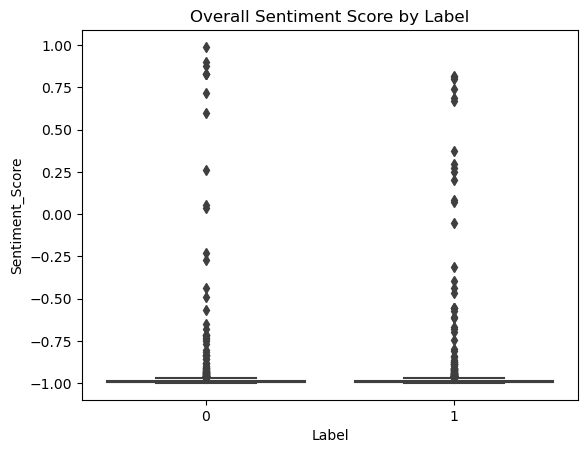

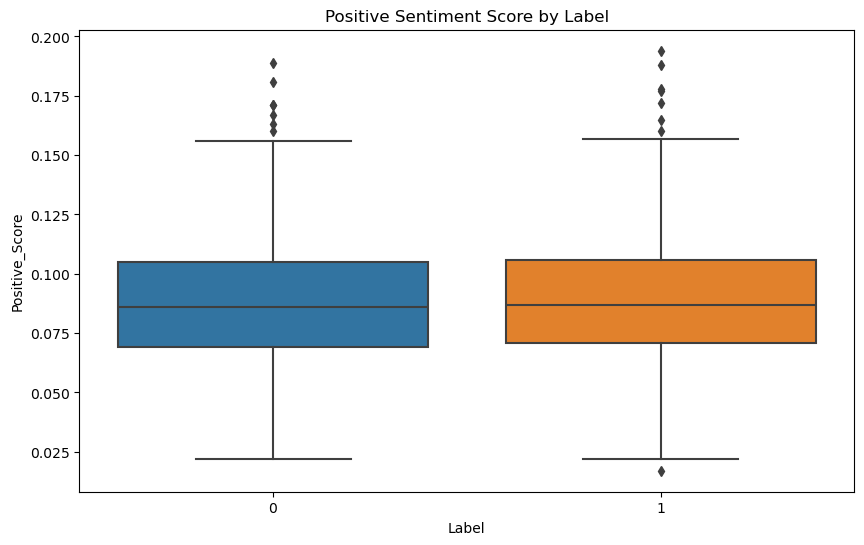

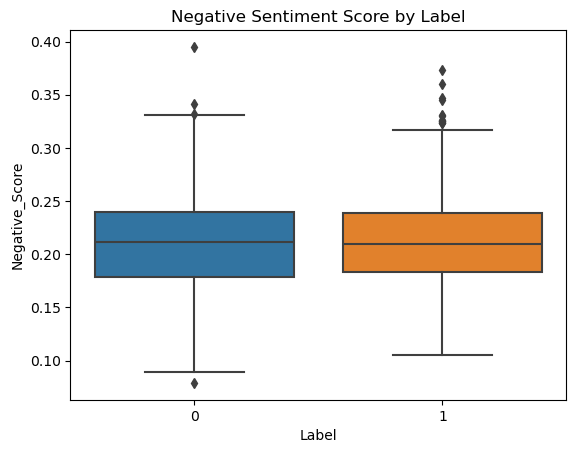

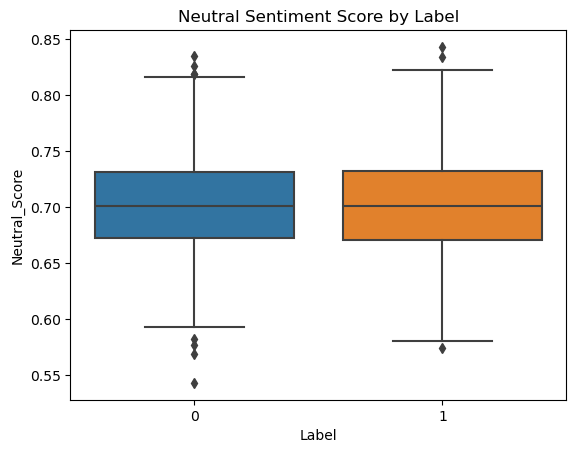

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation between sentiment scores and the Label
correlation = final_df[['Positive_Score', 'Negative_Score', 'Neutral_Score', 'Sentiment_Score', 'Label']].corr()

# Boxplot by Label
sns.boxplot(x='Label', y='Sentiment_Score', data=final_df)
plt.title("Overall Sentiment Score by Label")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='Positive_Score', data=final_df)
plt.title("Positive Sentiment Score by Label")
plt.show()

sns.boxplot(x='Label', y='Negative_Score', data=final_df)
plt.title("Negative Sentiment Score by Label")
plt.show()

sns.boxplot(x='Label', y='Neutral_Score', data=final_df)
plt.title("Neutral Sentiment Score by Label")
plt.show()

In [ ]:
correlation

Positive_Score  Negative_Score  Neutral_Score  \
Positive_Score         1.000000       -0.296510      -0.307076   
Negative_Score        -0.296510        1.000000      -0.817774   
Neutral_Score         -0.307076       -0.817774       1.000000   
Sentiment_Score        0.329619       -0.316759       0.116655   
Label                  0.012559       -0.002745      -0.004926   

                 Sentiment_Score     Label  
Positive_Score          0.329619  0.012559  
Negative_Score         -0.316759 -0.002745  
Neutral_Score           0.116655 -0.004926  
Sentiment_Score         1.000000 -0.003387  
Label                  -0.003387  1.000000

In [ ]:
# # Since a new col is added, we run these again
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# final_df = pd.concat([combined_df_copy.reset_index(drop=True), tfidf_df, combined_df_copy[['Sentiment_Score']]], axis=1)

In [ ]:
final_df['Date'] = pd.to_datetime(final_df['Date'])

# Define the training and testing datasets
train_df = final_df[(final_df['Date'] >= '2008-08-08') & (final_df['Date'] <= '2014-12-31')]
test_df = final_df[(final_df['Date'] >= '2015-01-02') & (final_df['Date'] <= '2016-07-01')]

# Features to include in the model
sentiment_features = ['Positive_Score', 'Negative_Score', 'Neutral_Score', 'Sentiment_Score']
tfidf_features = [col for col in final_df.columns if col not in ['Date', 'Label', 'Combined_Hlines',
                                                                 'Tokenized_Hlines', 'Lemmatization_Hlines',
                                                                 'Cleaned_Hlines', 'Differences',
                                                                 'Positive_Score', 'Negative_Score',
                                                                 'Neutral_Score', 'Sentiment_Score']]

# Combine sentiment features + TF-IDF features
X_train = train_df[sentiment_features + tfidf_features]
X_test = test_df[sentiment_features + tfidf_features]

y_train = train_df['Label']
y_test = test_df['Label']

# Checking the dimensions
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1611, 1004), (378, 1004), (1611,), (378,))

In [ ]:
# Random Foreset to predict the Label
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    # n_estimators : # of trees. more trees can improve performance
    # random_states = 42: ensures reproducibility
    # class_weight = 'balanced' Adjusts for imbalanced data by giving higher weight to minority

# Train the m
rf_classifier.fit(X_train, y_train)

# predictions
y_pred = rf_classifier.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.49
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.18      0.25       186
           1       0.50      0.79      0.61       192

    accuracy                           0.49       378
   macro avg       0.47      0.48      0.43       378
weighted avg       0.47      0.49      0.43       378



Label 0 - only 45% were correct.
Label 1 - Only 50%

model correctly identified label 0 only 18%
model correctly identified label 1 79%

For Class 0: 0.25 (poor performance).
For Class 1: 0.61 (moderate performance).

The model is much better at predicting 1 than 0

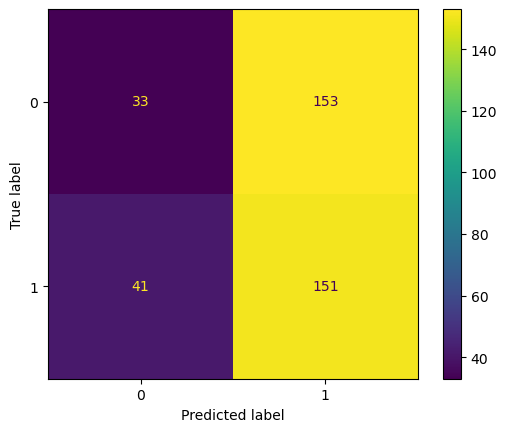

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=rf_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
disp.plot()


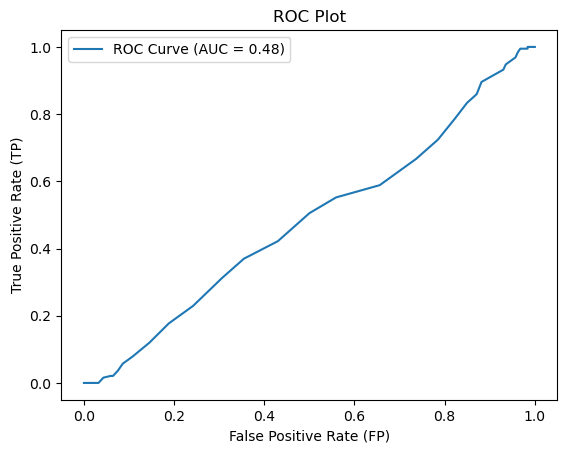

In [ ]:
# ROC & AUC plot
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate (FP)')
plt.ylabel('True Positive Rate (TP)')
plt.title('ROC Plot')
plt.legend()
plt.show()

# AUC = 1.0: Perfect classifier.
# AUC = 0.5: Random guessing.
# AUC < 0.5: Worse than random guessing
# Therefore, this model is slighly worse than Random guessing
# Then why this is worse than Random guessing?
# 1. If one class (0 or 1) dominates, the model may struggle to balance predictions.
# 2. Financial news and DJIA movements are highly complex, and simple textual features may not capture the necessary signal.

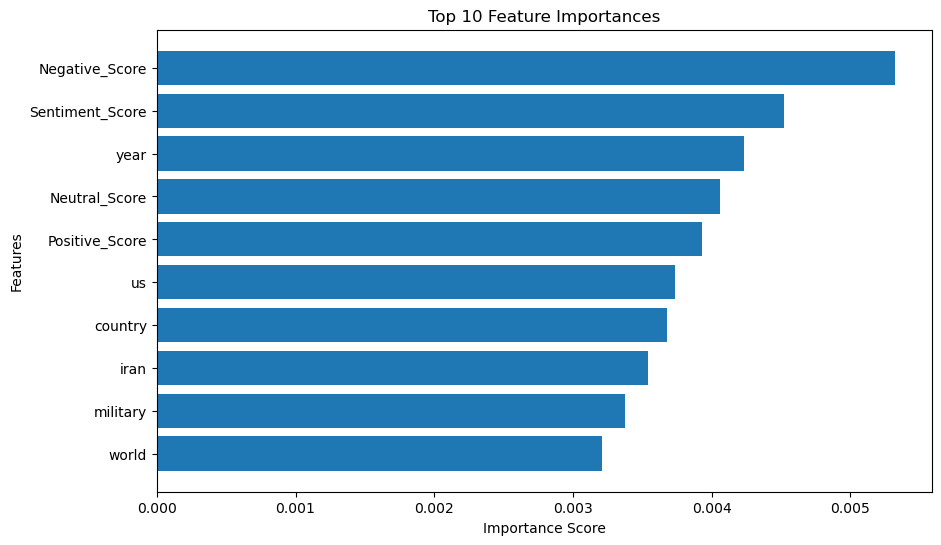

In [ ]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create df for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# print("Top 10 Important Features:")
# print(feature_importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution of labels after resampling
print("Label Distribution After SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Label Distribution After SMOTE:
Label
0    873
1    873
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1
)

# Fit the model to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Update the Random Forest model with the best parameters
rf_classifier = grid_search.best_estimator_

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [21]:
# Create lagged features for sentiment scores before splitting
for col in ['Positive_Score', 'Negative_Score', 'Neutral_Score', 'Sentiment_Score']:
    final_df[f'Lagged_{col}'] = final_df[col].shift(1)

# Ensure the lagged features are carried over into train and test datasets
train_df = final_df[(final_df['Date'] >= '2008-08-08') & (final_df['Date'] <= '2014-12-31')]
test_df = final_df[(final_df['Date'] >= '2015-01-02') & (final_df['Date'] <= '2016-07-01')]

# Define lagged features
lagged_features = [f'Lagged_{col}' for col in ['Positive_Score', 'Negative_Score', 'Neutral_Score', 'Sentiment_Score']]

# Update training and testing sets with lagged features
X_train = train_df[sentiment_features + lagged_features + tfidf_features].dropna()
X_test = test_df[sentiment_features + lagged_features + tfidf_features].dropna()

y_train = train_df['Label'][X_train.index]
y_test = test_df['Label'][X_test.index]

# Random Forest

In [ ]:
# Apply the best parameters by Grid_search
rf_classifier = grid_search.best_estimator_

# Fit the train data
rf_classifier.fit(X_train, y_train)
# Predict
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Compute ROC-AUC
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob_rf)
print(f"ROC-AUC Score: {auc:.2f}")

Accuracy: 0.49
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.31      0.39       186
           1       0.52      0.71      0.60       192

    accuracy                           0.51       378
   macro avg       0.51      0.51      0.49       378
weighted avg       0.51      0.51      0.49       378

ROC-AUC Score: 0.48


1. Problem with the Initial Model

The model was biased toward predicting label 1

It had poor performance for label 0

2. Steps We Took to Improve the Model

a. Resampling with SMOTE

Used SMOTE (Synthetic Minority Oversampling Technique) to create more examples of the minority class (Label = 0)

Why:
Balancing the dataset helps the model treat both 0 and 1 equally.

Result:
Improved recall for Label = 0 (the model got better at detecting decreases).

b. Adding Lagged Features

Added lagged sentiment scores (e.g., yesterday’s sentiment) to the feature set

Why:
Financial markets are influenced by past trends, so lagged features provide temporal context for predictions

Result:
Slight improvement in accuracy and F1-score, especially for Label = 0

c. Hyperparameter Tuning with GridSearchCV

Used GridSearchCV to find the best parameters for the Random Forest model

Why:
Optimizing these settings helps the model learn more effectively without overfitting

Result:
Improved the model's balance between precision and recall for both classes

# Logistic Regression

It’s Simple and Effective - Logistic Regression performs well on high-dimensional data

Works Well with Sparse Data -  TF-IDF vectors are sparse (many zeros), which Logistic Regression handles efficiently

Interpretable: Logistic Regression provides interpretable feature coefficients, which can help identify which words or features are most predictive.

## Challenges with Logistic Regression

High dimensionality can lead to overfitting. Some TF-IDF features might be noisy or irrelevant.

Solution:
Regularization - Use L1 or L2 regularization to shrink irrelevant coefficients toward zero, effectively performing feature selection.


In [ ]:
# L2 Regularization
# Shrinks all coefficients toward zero but doesn’t eliminate any
# Coefficients of less important features become very small but remain non-zero
# Useful when most features are relevant, and the goal is to avoid overfitting --> mostly deal with L1 in our case

from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Evaluate performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_prob):.2f}")

Accuracy: 0.47
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.42      0.44       186
           1       0.48      0.52      0.50       192

    accuracy                           0.47       378
   macro avg       0.47      0.47      0.47       378
weighted avg       0.47      0.47      0.47       378

ROC-AUC Score: 0.44


In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Type of regularization
    'solver': ['liblinear']  # Use liblinear for L1 regularization
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42), # max_iter=1000: L2 is applied
    param_grid,
    scoring='accuracy',
    cv=3
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate with best parameters
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test)
y_pred_prob = best_logreg.predict_proba(X_test)[:, 1]

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# L1 Regularization

logreg_l1 = LogisticRegression(
    penalty='l1',         # Use L1 regularization
    solver='liblinear',   # Solver compatible with L1 regularization
    max_iter=1000,        # Maximum iterations for convergence
    class_weight='balanced',  # Handle class imbalance
    C=1.0                 # Regularization strength (higher = less regularization)
)

# Train the model on the training data
logreg_l1.fit(X_train, y_train)

# Predict on the test set
y_pred_l1 = logreg_l1.predict(X_test)
y_pred_prob_l1 = logreg_l1.predict_proba(X_test)[:, 1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_l1):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_l1))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_prob_l1):.2f}")

Accuracy: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.39      0.44       186
           1       0.51      0.60      0.55       192

    accuracy                           0.50       378
   macro avg       0.50      0.50      0.49       378
weighted avg       0.50      0.50      0.49       378

ROC-AUC Score: 0.48


Precision and Recall:

Class 0 (DJIA Decrease):
Precision (0.49): Out of all the predictions for 0, 49% are correct
Recall (0.39): The model identifies 39% of actual decreases correctly

Class 1 (DJIA Increase):
Precision (0.50): Out of all predictions for 1, 50% are correct
Recall (0.60): The model identifies 60% of actual increases correctly

Observation:
The model still favors predicting 1 (increases) over 0 (decreases), as indicated by the higher recall for Class 1.

F1-Scores: The F1-scores show that the model performs slightly better for predicting increases than decreases.

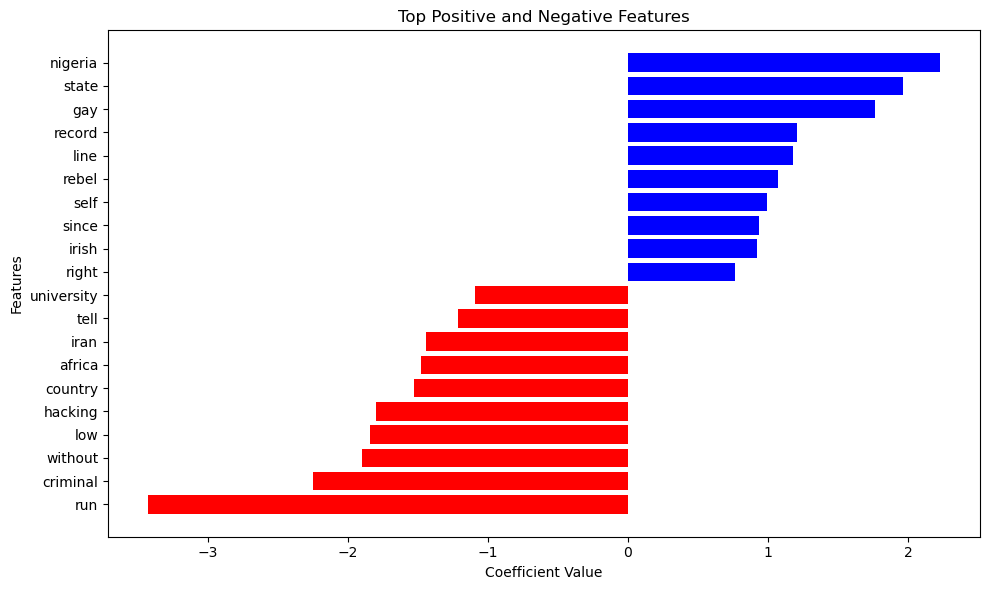

In [ ]:
# top 10 positive and negative coefficients for plotting
top_positive_features = feature_coefficients.head(10)
top_negative_features = feature_coefficients.tail(10)

# Combine positive and negative features for plotting
top_features = pd.concat([top_positive_features, top_negative_features])

# Create a bar plot
plt.figure(figsize=(10, 6))
# blue --> positve / red --> negative
colors = ['blue' if coef > 0 else 'red' for coef in top_features['Coefficient']]
plt.barh(top_features['Feature'], top_features['Coefficient'], color=colors)

# Add labels and title
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Top Positive and Negative Features")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, recall_score, f1_score

# Calculate metrics for Random Forest
rf_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Recall (Class `0`)": recall_score(y_test, y_pred_rf, pos_label=0),
    "Recall (Class `1`)": recall_score(y_test, y_pred_rf, pos_label=1),
    "F1-Score (Class `0`)": f1_score(y_test, y_pred_rf, pos_label=0),
    "F1-Score (Class `1`)": f1_score(y_test, y_pred_rf, pos_label=1),
    "ROC-AUC": roc_auc_score(y_test, y_pred_prob_rf)
}

# Calculate metrics for Logistic Regression (L1)
lr_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_l1),
    "Recall (Class `0`)": recall_score(y_test, y_pred_l1, pos_label=0),
    "Recall (Class `1`)": recall_score(y_test, y_pred_l1, pos_label=1),
    "F1-Score (Class `0`)": f1_score(y_test, y_pred_l1, pos_label=0),
    "F1-Score (Class `1`)": f1_score(y_test, y_pred_l1, pos_label=1),
    "ROC-AUC": roc_auc_score(y_test, y_pred_prob_l1)
}

# Combine results into a DataFrame
comparison_table = pd.DataFrame({
    "Metric": list(rf_metrics.keys()),
    "Random Forest (SMOTE + Lagged)": list(rf_metrics.values()),
    "Logistic Regression (L1)": list(lr_metrics.values())
})
comparison_table

Metric  Random Forest (SMOTE + Lagged)  \
0              Accuracy                        0.513228   
1    Recall (Class `0`)                        0.311828   
2    Recall (Class `1`)                        0.708333   
3  F1-Score (Class `0`)                        0.386667   
4  F1-Score (Class `1`)                        0.596491   
5               ROC-AUC                        0.478243   

   Logistic Regression (L1)  
0                  0.500000  
1                  0.392473  
2                  0.604167  
3                  0.435821  
4                  0.551069  
5                  0.484599

1. Reduce Sparsity (Low-Variance Feature Removal)

    Since TF-IDF produces many columns with near-zero values, removing low-variance features helps simplify the data.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Remove low-variance features (adjust the threshold as needed)
selector = VarianceThreshold(threshold=0.001)  # Retain features with variance > 0.01
X_train_reduced = selector.fit_transform(X_train)
X_test_reduced = selector.transform(X_test)
X_train_reduced.shape

(1610, 222)

2. Apply PCA for Dimensionality Reduction

    PCA reduces the number of features while retaining most of the data's variance.

In [ ]:
from sklearn.decomposition import PCA
# Apply PCA to reduce the dimensionality of the dataset
pca = PCA(n_components=50, random_state=42)  # Retain 50 principal components
X_train_pca = pca.fit_transform(X_train_reduced)
X_test_pca = pca.transform(X_test_reduced)

3. Fit Logistic Regression Using statsmodels

    Fit the logistic regression model using the processed data.

In [ ]:
# Check the shapes of y_train and X_train_with_intercept
print("Shape of y_train:", y_train.shape)
print("Shape of X_train_with_intercept:", X_train_with_intercept.shape)

# Check indices of y_train and X_train_with_intercept
print("Indices of y_train:", y_train.index[:5])
print("Indices of X_train_with_intercept:", X_train_with_intercept.index[:5])


Shape of y_train: (1610,)
Shape of X_train_with_intercept: (1610, 51)
Indices of y_train: Index([1, 2, 3, 4, 5], dtype='int64')
Indices of X_train_with_intercept: RangeIndex(start=0, stop=5, step=1)


In [ ]:
import statsmodels.api as sm
import pandas as pd

# Convert PCA output to DataFrame and add intercept
X_train_pca_df = pd.DataFrame(X_train_pca)
X_test_pca_df = pd.DataFrame(X_test_pca)

# Add an intercept column for statsmodels
X_train_with_intercept = sm.add_constant(X_train_pca_df)
X_test_with_intercept = sm.add_constant(X_test_pca_df)

# Reset indices of y_train and X_train_with_intercept
y_train_aligned = y_train.reset_index(drop=True)
X_train_with_intercept_aligned = X_train_with_intercept.reset_index(drop=True)

# Ensure alignment
print("Aligned y_train shape:", y_train_aligned.shape)
print("Aligned X_train_with_intercept shape:", X_train_with_intercept_aligned.shape)

# Fit the logistic regression model with aligned data
logit_model = sm.Logit(y_train_aligned, X_train_with_intercept_aligned).fit()



Aligned y_train shape: (1610,)
Aligned X_train_with_intercept shape: (1610, 51)
Optimization terminated successfully.
         Current function value: 0.675382
         Iterations 5


In [ ]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Label   No. Observations:                 1610
Model:                          Logit   Df Residuals:                     1559
Method:                           MLE   Df Model:                           50
Date:                Wed, 11 Dec 2024   Pseudo R-squ.:                 0.02058
Time:                        01:08:34   Log-Likelihood:                -1087.4
converged:                       True   LL-Null:                       -1110.2
Covariance Type:            nonrobust   LLR p-value:                    0.6463
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1733      0.051      3.413      0.001       0.074       0.273
0              0.0387      0.263      0.147      0.883      -0.477       0.554
1             -0.0559      0.266     -0.210      0.833      -0.577       0.465
2             -0.3741      0.493     -0.759      0.448      -1.340       0.592
3             -0.0286      0.568     -0.050      0.960      -1.142       1.085
4             -0.0456      0.604     -0.075      0.940      -1.230       1.139
5              0.6823      0.645      1.058      0.290      -0.582       1.947
6              0.1067      0.691      0.155      0.877      -1.247       1.460
7              0.3419      0.713      0.479      0.632      -1.056       1.740
8              0.7182      0.780      0.921      0.357      -0.811       2.247
9              0.0286      0.788      0.036      0.971      -1.515       1.573
10            -1.5698      0.819     -1.917      0.055      -3.175       0.035
11            -0.7587      0.854     -0.889      0.374      -2.432       0.915
12            -0.5535      0.883     -0.627      0.531      -2.283       1.176
13             0.8600      0.895      0.961      0.336      -0.894       2.613
14             0.3320      0.917      0.362      0.717      -1.465       2.129
15             0.1410      0.926      0.152      0.879      -1.674       1.956
16            -0.8794      0.943     -0.932      0.351      -2.728       0.969
17             2.1658      0.958      2.260      0.024       0.287       4.044
18            -1.1942      0.968     -1.233      0.217      -3.092       0.704
19            -1.0732      0.988     -1.087      0.277      -3.009       0.863
20             1.1590      0.991      1.169      0.242      -0.784       3.102
21             1.1001      1.011      1.088      0.276      -0.881       3.081
22            -1.5462      1.018     -1.520      0.129      -3.541       0.448
23             0.6392      1.045      0.612      0.541      -1.409       2.687
24            -1.0039      1.045     -0.961      0.336      -3.051       1.043
25             0.5890      1.055      0.558      0.577      -1.478       2.656
26            -0.5721      1.070     -0.535      0.593      -2.669       1.524
27             0.9937      1.074      0.925      0.355      -1.111       3.098
28            -0.5824      1.077     -0.541      0.589      -2.693       1.528
29             0.1379      1.080      0.128      0.898      -1.980       2.256
30             0.0859      1.089      0.079      0.937      -2.049       2.221
31            -0.1423      1.108     -0.128      0.898      -2.314       2.029
32            -1.0487      1.112     -0.943      0.346      -3.229       1.132
33            -1.4465      1.126     -1.285      0.199      -3.653       0.760
34            -1.8764      1.137     -1.650      0.099      -4.105       0.353
35            -1.4665      1.139     -1.287      0.198      -3.699       0.766
36             0.2860      1.148      0.249      0.803      -1.964       2.536
37

In [ ]:
# Get the PCA components matrix
pca_components = pd.DataFrame(pca.components_, columns=selector.get_feature_names_out())

component_17_weights = pca_components.iloc[17]  # Get the 17th component since p-val < 0.05
print(component_17_weights.sort_values(ascending=False))

syria                    0.400826
Lagged_Negative_Score    0.198750
syrian                   0.184161
chemical                 0.170469
weapon                   0.136313
                           ...   
pakistan                -0.128764
nsa                     -0.150073
Lagged_Neutral_Score    -0.236310
georgia                 -0.238028
amp                     -0.351820
Name: 17, Length: 222, dtype: float64


On This Model
The model is not performing well overall (low R^2, high P-value)

Only a few components (Component 17) are significant, which limits the model's usefulness.

Logistic regression might not be the best choice due to its linear nature.


# Linear Reg

In [22]:
from sklearn.preprocessing import MinMaxScaler

# # Initialize MinMaxScaler
scaler = MinMaxScaler()

# # Fit and transform the TF-IDF values
tfidf_normalized = scaler.fit_transform(tfidf_df)

# # Convert the normalized values back to a DataFrame
tfidf_normalized_df = pd.DataFrame(tfidf_normalized, columns=tfidf_df.columns)

# final_df = pd.merge(final_df, tfidf_normalized_df, on='Date', how='inner')

nonnormalized = [col for col in final_df.columns if col not in [
    'Date', 'Label', 'Combined_Hlines', 'Tokenized_Hlines', 'Lemmatization_Hlines',
    'Cleaned_Hlines', 'Differences', 'Positive_Score', 'Negative_Score',
    'Neutral_Score', 'Sentiment_Score', 'Lagged_Positive_Score', 'Lagged_Negative_Score','Lagged_Neutral_Score', 'Lagged_Sentiment_Score'
]]

final_df = pd.concat([final_df.drop(columns = nonnormalized), tfidf_normalized_df], axis=1)

In [23]:
final_df

Date  Label                                    Combined_Hlines  \
0     2008-08-08      0  Georgia downs two Russian warplanes as countri...   
1     2008-08-11      1  Why wont America and Nato help us? If they won...   
2     2008-08-12      0  Remember that adorable 9-year-old who sang at ...   
3     2008-08-13      0   U.S. refuses Israel weapons to attack Iran: r...   
4     2008-08-14      1  All the experts admit that we should legalise ...   
...          ...    ...                                                ...   
1984  2016-06-27      0  Barclays and RBS shares suspended from trading...   
1985  2016-06-28      1  2,500 Scientists To Australia: If You Want To ...   
1986  2016-06-29      1  Explosion At Airport In Istanbul || Yemeni for...   
1987  2016-06-30      1  Jamaica proposes marijuana dispensers for tour...   
1988  2016-07-01      1  A 117-year-old woman in Mexico City finally re...   

                                       Tokenized_Hlines  \
0     [Georgia, downs, two, Russian, warplanes, coun...   
1     [wont, America, Nato, help, us, ?, wont, help,...   
2     [Remember, adorable, 9-year-old, sang, opening...   
3     [U.S., refuses, Israel, weapons, attack, Iran,...   
4     [experts, admit, legalise, drugs, ||, War, Sou...   
...                                                 ...   
1984  [Barclays, RBS, shares, suspended, trading, ta...   
1985  [2,500, Scientists, Australia, :, Want, Save, ...   
1986  [Explosion, Airport, Istanbul, ||, Yemeni, for...   
1987  [Jamaica, proposes, marijuana, dispensers, tou...   
1988  [117-year-old, woman, Mexico, City, finally, r...   

                                   Lemmatization_Hlines  \
0     [Georgia, down, two, Russian, warplane, countr...   
1     [wont, America, Nato, help, u, ?, wont, help, ...   
2     [Remember, adorable, 9-year-old, sang, opening...   
3     [U.S., refuse, Israel, weapon, attack, Iran, :...   
4     [expert, admit, legalise, drug, ||, War, South...   
...                                                 ...   
1984  [Barclays, RBS, share, suspended, trading, tan...   
1985  [2,500, Scientists, Australia, :, Want, Save, ...   
1986  [Explosion, Airport, Istanbul, ||, Yemeni, for...   
1987  [Jamaica, proposes, marijuana, dispenser, tour...   
1988  [117-year-old, woman, Mexico, City, finally, r...   

                                            Differences  \
0     [(downs, down), (warplanes, warplane), (countr...   
1     [(us, u), (us, u), (puts, put), (fireworks, fi...   
2     [(ceremonies, ceremony), (ends, end), (childre...   
3     [(refuses, refuse), (weapons, weapon), (clears...   
4     [(experts, expert), (drugs, drug), (pictures, ...   
...                                                 ...   
1984  [(shares, share), (says, say), (gays, gay), (s...   
1985  [(details, detail), (officers, officer), (offi...   
1986  [(scientists, scientist), (conservationists, c...   
1987  [(dispensers, dispenser), (tourists, tourist),...   
1988  [(hours, hour), (years, year), (backs, back), ...   

                                         Cleaned_Hlines  Sentiment_Score  \
0     Georgia down two Russian warplane country move...          -0.9973   
1     wont America Nato help u ? wont help u , help ...          -0.9904   
2     Remember adorable 9-year-old sang opening cere...          -0.9945   
3     U.S. refuse Israel weapon attack Iran : report...          -0.9695   
4     expert admit legalise drug || War South Osetia...          -0.9886   
...                                                 ...              ...   
1984  Barclays RBS share suspended trading tanking 8...          -0.9809   
1985  2,500 Scientists Australia : Want Save Great B...          -0.9424   
1986  Explosion Airport Istanbul || Yemeni former pr...          -0.9943   
1987  Jamaica proposes marijuana dispenser tourist a...          -0.9980   
1988  117-year-old woman Mexico City finally receive...          -0.9987   

      Positive_Score  Negative_Scor

In [24]:
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])
final_df['Date'] = pd.to_datetime(final_df['Date'])
stock_prices['Change_in_Price'] = stock_prices['Close'] - stock_prices['Open']

final_df = pd.merge(final_df, stock_prices[['Date', 'Change_in_Price']], on='Date', how='inner')
y = final_df['Change_in_Price']

# Response variable as Price Change as %
# final_df['Pct_Change'] = final_df['Change_in_Price'].pct_change()
# y = final_df['Pct_Change']

In [25]:
# Train & Test split
train_df = final_df[(final_df['Date'] >= '2008-08-08') & (final_df['Date'] <= '2014-12-31')]
test_df = final_df[(final_df['Date'] >= '2015-01-02') & (final_df['Date'] <= '2016-07-01')]

# Define features and target
sentiment_features = ['Positive_Score', 'Negative_Score', 'Neutral_Score']
tfidf_features = [col for col in final_df.columns if col not in [
    'Date', 'Label', 'Combined_Hlines', 'Tokenized_Hlines', 'Lemmatization_Hlines',
    'Cleaned_Hlines', 'Differences', 'Positive_Score', 'Negative_Score',
    'Neutral_Score', 'Sentiment_Score', 'Change_in_Price', 'Lagged_Sentiment_Score'
]]

X_train_linear = train_df[sentiment_features + tfidf_features].fillna(0)
X_test_linear = test_df[sentiment_features + tfidf_features].dropna()

# Target variable
y_train_linear = train_df['Change_in_Price']
y_test_linear = test_df['Change_in_Price']

y_train_linear = y_train_linear.loc[X_train_linear.index]
y_test_linear = y_test_linear.loc[X_test_linear.index]

X_train_linear = X_train_linear.reset_index(drop=True)
y_train_linear = y_train_linear.reset_index(drop=True)

X_test_linear = X_test_linear.reset_index(drop=True)
y_test_linear = y_test_linear.reset_index(drop=True)

# Check dimensions
print("Training Features Shape:", X_train_linear.shape)
print("Testing Features Shape:", X_test_linear.shape)
print("Training Target Shape:", y_train_linear.shape)
print("Testing Target Shape:", y_test_linear.shape)

Training Features Shape: (1611, 1006)
Testing Features Shape: (378, 1006)
Training Target Shape: (1611,)
Testing Target Shape: (378,)


In [26]:
# Standardizes the features to have a mean of 0 and a std of 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import statsmodels.api as sm

X_train_scaled_linear = scaler.fit_transform(X_train_linear)
X_test_scaled_linear = scaler.transform(X_test_linear)

# Adding intercept
X_train_linear = sm.add_constant(X_train_linear)
X_test_linear = sm.add_constant(X_test_linear, has_constant='add')

X_train_linear = X_train_linear.reset_index(drop=True)
y_train_linear = y_train_linear.reset_index(drop=True)

X_test_linear = X_test_linear.reset_index(drop=True)
y_test_linear = y_test_linear.reset_index(drop=True)

# Fit the model
linear_model = sm.OLS(y_train_linear, X_train_linear).fit()

# Extract coeff & P-values
p_values = linear_model.pvalues
coefficients = linear_model.params

significant = p_values < 0.05
significant_coefficients = coefficients[significant]
significant_p_values = p_values[significant]

significant_results = pd.DataFrame({
    'Coefficient': significant_coefficients,
    'P-Value': significant_p_values
})

print("Significant Coefficients (p-value < 0.05):")
print(significant_results)

Significant Coefficients (p-value < 0.05):
                Coefficient   P-Value
300             -112.673840  0.038113
40               -91.686021  0.037521
ago             -182.044447  0.007699
almost            80.887245  0.033888
bank            -131.997767  0.001870
business        -152.404150  0.019766
dangerous       -146.855845  0.027312
even             -75.801763  0.034556
financial         98.897780  0.021786
fine            -166.120057  0.032478
georgia         -190.510961  0.049995
hacking         -215.540207  0.014834
jailed           102.910742  0.019934
japanese         113.624612  0.027530
judge             83.290939  0.047702
libya            216.184295  0.039722
meeting         -138.076421  0.025469
nation           102.416748  0.016960
next              76.108496  0.045142
non              120.257864  0.030554
nuclear         -171.722016  0.007207
order            -81.686607  0.041080
photo           -132.710538  0.026366
president         75.610572  0.046687
preside

In [27]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Change_in_Price   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                 -0.047
Method:                 Least Squares   F-statistic:                    0.9286
Date:                Wed, 18 Dec 2024   Prob (F-statistic):              0.848
Time:                        04:47:11   Log-Likelihood:                -9456.5
No. Observations:                1611   AIC:                         2.092e+04
Df Residuals:                     607   BIC:                         2.633e+04
Df Model:                        1003                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.045e+

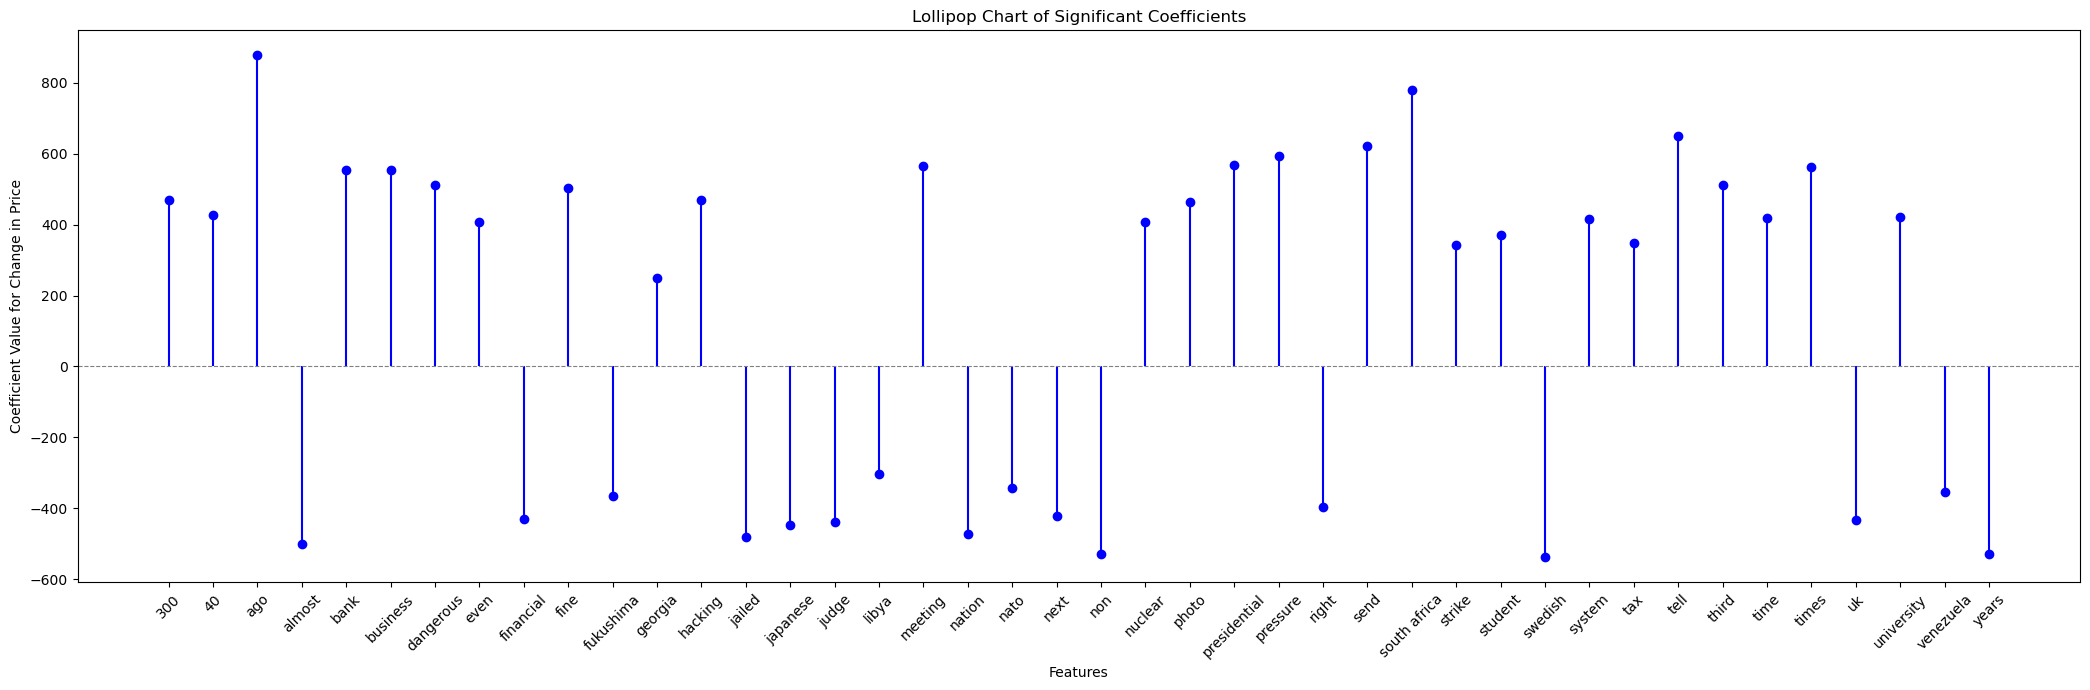

In [ ]:
# Visualize Linear reg plot
plt.figure(figsize=(21, 7))
plt.stem(significant_results.index, significant_results['Coefficient'], linefmt='blue', markerfmt='bo', basefmt=" ")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Lollipop Chart of Significant Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value for Change in Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
# Sort the DataFrame by coefficient values
significant_results_sorted = significant_results.sort_values(by='Coefficient')

# Get the top 5 words with positive coefficients
top_5_positive = significant_results_sorted[~significant_results_sorted.index.isin(['al', 'yr'])].tail(5)

# Get the top 5 words with negative coefficients
top_5_negative = significant_results_sorted.head(5)

print("Top 5 words with positive coefficients:")
top_5_positive

Top 5 words with positive coefficients:


Coefficient   P-Value
station   117.074087  0.047041
non       120.257864  0.030554
uk        125.186496  0.009603
swedish   142.502758  0.013737
libya     216.184295  0.039722

In [29]:
top_5_negative = significant_results_sorted[~significant_results_sorted.index.isin(['al', 'yr'])].head(5)

print("Top 5 words with negative coefficients (excluding 'al' and 'yr'):")
top_5_negative

Top 5 words with negative coefficients (excluding 'al' and 'yr'):


Coefficient   P-Value
vladimir putin  -270.684315  0.039676
hacking         -215.540207  0.014834
georgia         -190.510961  0.049995
ago             -182.044447  0.007699
nuclear         -171.722016  0.007207

In [30]:
top_words = list(top_5_positive.index) + list(top_5_negative.index)

# Filter merged_df for entries where the specified words' TF-IDF values are greater than 0.
filtered_merged_df = final_df[final_df[top_words].gt(0).any(axis=1)]

filtered_merged_df

Date  Label                                    Combined_Hlines  \
0    2008-08-08      0  Georgia downs two Russian warplanes as countri...   
1    2008-08-11      1  Why wont America and Nato help us? If they won...   
2    2008-08-12      0  Remember that adorable 9-year-old who sang at ...   
3    2008-08-13      0   U.S. refuses Israel weapons to attack Iran: r...   
4    2008-08-14      1  All the experts admit that we should legalise ...   
...         ...    ...                                                ...   
1984 2016-06-27      0  Barclays and RBS shares suspended from trading...   
1985 2016-06-28      1  2,500 Scientists To Australia: If You Want To ...   
1986 2016-06-29      1  Explosion At Airport In Istanbul || Yemeni for...   
1987 2016-06-30      1  Jamaica proposes marijuana dispensers for tour...   
1988 2016-07-01      1  A 117-year-old woman in Mexico City finally re...   

                                       Tokenized_Hlines  \
0     [Georgia, downs, two, Russian, warplanes, coun...   
1     [wont, America, Nato, help, us, ?, wont, help,...   
2     [Remember, adorable, 9-year-old, sang, opening...   
3     [U.S., refuses, Israel, weapons, attack, Iran,...   
4     [experts, admit, legalise, drugs, ||, War, Sou...   
...                                                 ...   
1984  [Barclays, RBS, shares, suspended, trading, ta...   
1985  [2,500, Scientists, Australia, :, Want, Save, ...   
1986  [Explosion, Airport, Istanbul, ||, Yemeni, for...   
1987  [Jamaica, proposes, marijuana, dispensers, tou...   
1988  [117-year-old, woman, Mexico, City, finally, r...   

                                   Lemmatization_Hlines  \
0     [Georgia, down, two, Russian, warplane, countr...   
1     [wont, America, Nato, help, u, ?, wont, help, ...   
2     [Remember, adorable, 9-year-old, sang, opening...   
3     [U.S., refuse, Israel, weapon, attack, Iran, :...   
4     [expert, admit, legalise, drug, ||, War, South...   
...                                                 ...   
1984  [Barclays, RBS, share, suspended, trading, tan...   
1985  [2,500, Scientists, Australia, :, Want, Save, ...   
1986  [Explosion, Airport, Istanbul, ||, Yemeni, for...   
1987  [Jamaica, proposes, marijuana, dispenser, tour...   
1988  [117-year-old, woman, Mexico, City, finally, r...   

                                            Differences  \
0     [(downs, down), (warplanes, warplane), (countr...   
1     [(us, u), (us, u), (puts, put), (fireworks, fi...   
2     [(ceremonies, ceremony), (ends, end), (childre...   
3     [(refuses, refuse), (weapons, weapon), (clears...   
4     [(experts, expert), (drugs, drug), (pictures, ...   
...                                                 ...   
1984  [(shares, share), (says, say), (gays, gay), (s...   
1985  [(details, detail), (officers, officer), (offi...   
1986  [(scientists, scientist), (conservationists, c...   
1987  [(dispensers, dispenser), (tourists, tourist),...   
1988  [(hours, hour), (years, year), (backs, back), ...   

                                         Cleaned_Hlines  Sentiment_Score  \
0     Georgia down two Russian warplane country move...          -0.9973   
1     wont America Nato help u ? wont help u , help ...          -0.9904   
2     Remember adorable 9-year-old sang opening cere...          -0.9945   
3     U.S. refuse Israel weapon attack Iran : report...          -0.9695   
4     expert admit legalise drug || War South Osetia...          -0.9886   
...                                                 ...              ...   
1984  Barclays RBS share suspended trading tanking 8...          -0.9809   
1985  2,500 Scientists Australia : Want Save Great B...          -0.9424   
1986  Explosion Airport Istanbul || Yemeni former pr...          -0.9943   
1987  Jamaica proposes marijuana dispenser tourist a...          -0.9980   
1988  117-year-old woman Mexico City finally receive...          -0.9987   

      Positive_Score  Negative_Score  ...  yea

Text(0.5, 1.0, 'TF-IDF for "Hacking" over time')

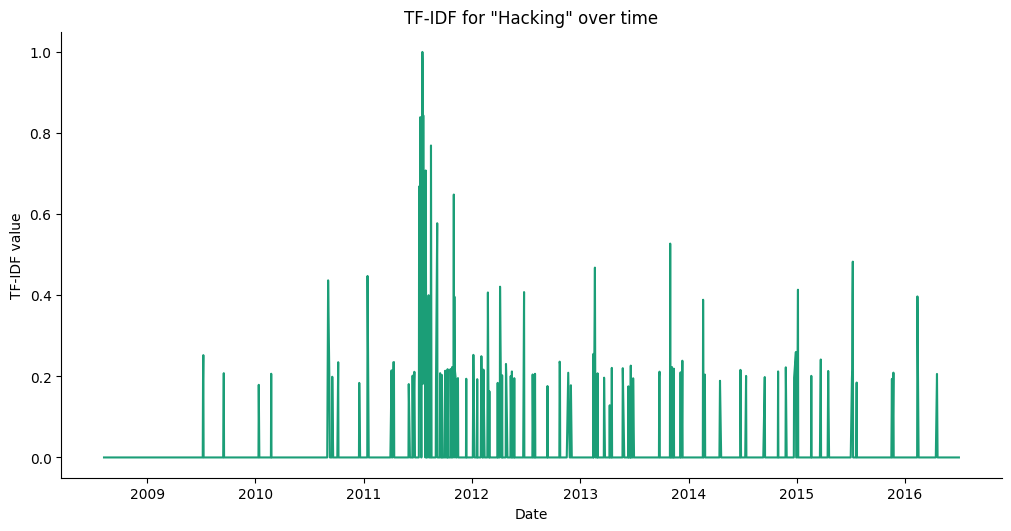

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['hacking']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = filtered_merged_df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('TF-IDF value')
plt.title('TF-IDF for "Hacking" over time')

<ipython-input-32-dcf31f03ec7b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merged_df['Date'] = pd.to_datetime(filtered_merged_df['Date'])


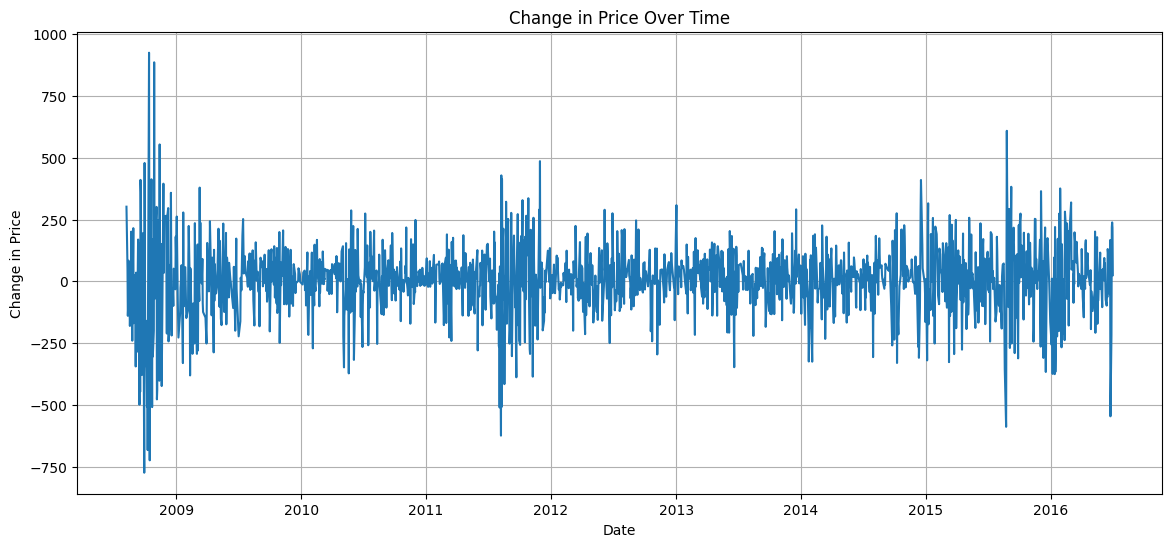

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime if it's not already
filtered_merged_df['Date'] = pd.to_datetime(filtered_merged_df['Date'])

# Sort the DataFrame by date
filtered_merged_df = filtered_merged_df.sort_values('Date')

plt.figure(figsize=(14, 6))
plt.plot(filtered_merged_df['Date'], filtered_merged_df['Change_in_Price'])
plt.xlabel('Date')
plt.ylabel('Change in Price')
plt.title('Change in Price Over Time')
plt.grid(True)
plt.show()

In [ ]:
# Get p-values and filter significant features
p_values = linear_model.pvalues
significant_features = p_values[p_values < 0.05].index  # Get names of significant features

# Filter the training and testing data to only include significant features
X_train_significant = X_train_linear[significant_features]
X_test_significant = X_test_linear[significant_features]

# Fit the model again with only significant features
linear_model_significant = sm.OLS(y_train_linear, X_train_significant).fit()

# Summary of the updated regression
print("\nRetrained Model Summary:")
print(linear_model_significant.summary())

# Making predictions with the updated model
predictions_significant = linear_model_significant.predict(X_test_significant)
print("\nUpdated Predictions:")
print(predictions_significant)

# Optional: Display significant coefficients from the retrained model
significant_coefficients = linear_model_significant.params
significant_p_values = linear_model_significant.pvalues
final_significant_results = pd.DataFrame({
    'Coefficient': significant_coefficients,
    'P-Value': significant_p_values
})
print("\nFinal Significant Coefficients (p-value < 0.05):")
print(final_significant_results)


Retrained Model Summary:
                                 OLS Regression Results                                
Dep. Variable:        Change_in_Price   R-squared (uncentered):                   0.067
Model:                            OLS   Adj. R-squared (uncentered):              0.042
Method:                 Least Squares   F-statistic:                              2.689
Date:                Wed, 11 Dec 2024   Prob (F-statistic):                    4.60e-08
Time:                        01:11:19   Log-Likelihood:                         -10142.
No. Observations:                1610   AIC:                                  2.037e+04
Df Residuals:                    1568   BIC:                                  2.059e+04
Df Model:                          42                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Finding residuals
residuals = y_test_linear - predictions_significant

# Calculate MSE MAE R^2
mse = mean_squared_error(y_test_linear, predictions_significant)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_linear, predictions_significant)
r2 = r2_score(y_test_linear, predictions_significant)

# Display metrics
metrics = {
    "Mean Squared Error (MSE)": mse,
    "Root Mean Squared Error (RMSE)": rmse,
    "Mean Absolute Error (MAE)": mae,
    "R-Squared": r2
}
metrics

{'Mean Squared Error (MSE)': 27134.314915624716,
 'Root Mean Squared Error (RMSE)': 164.72496749316636,
 'Mean Absolute Error (MAE)': 126.01742915372232,
 'R-Squared': -0.06320412845249113}

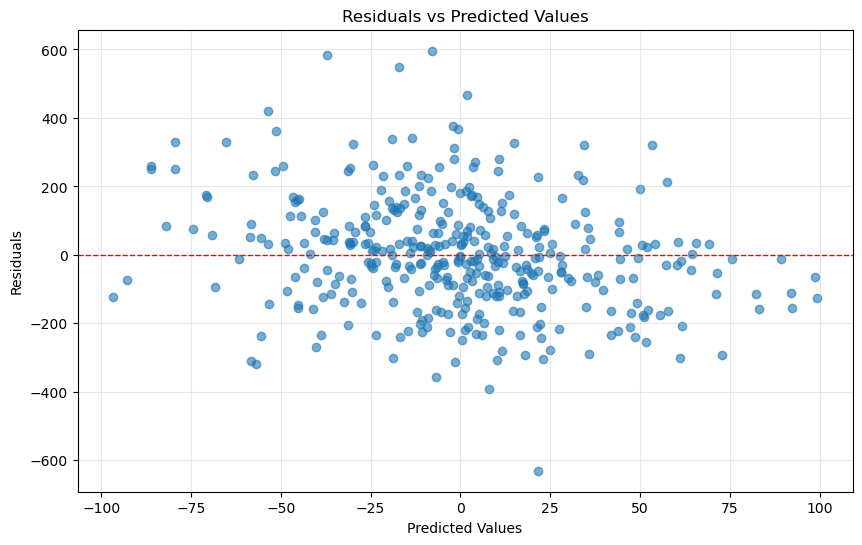

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions_significant, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(alpha=0.3)
plt.show()

# Naive Bayes

In [ ]:
import re
import pandas as pd
import numpy as np
import csv
import nltk
import random
import string

In [ ]:
reddit_df = pd.read_csv("RedditNews.csv")
combined_df = pd.read_csv("Combined_News_DJIA.csv")
stock_prices = pd.read_csv("upload_DJIA_table.csv")

In [ ]:
final_df.head()

Date  Label                                    Combined_Hlines  \
0  2008-08-08      0  Georgia downs two Russian warplanes as countri...   
1  2008-08-11      1  Why wont America and Nato help us? If they won...   
2  2008-08-12      0  Remember that adorable 9-year-old who sang at ...   
3  2008-08-13      0   U.S. refuses Israel weapons to attack Iran: r...   
4  2008-08-14      1  All the experts admit that we should legalise ...   

                                    Tokenized_Hlines  \
0  [Georgia, downs, two, Russian, warplanes, coun...   
1  [wont, America, Nato, help, us, ?, wont, help,...   
2  [Remember, adorable, 9-year-old, sang, opening...   
3  [U.S., refuses, Israel, weapons, attack, Iran,...   
4  [experts, admit, legalise, drugs, ||, War, Sou...   

                                Lemmatization_Hlines  \
0  [Georgia, down, two, Russian, warplane, countr...   
1  [wont, America, Nato, help, u, ?, wont, help, ...   
2  [Remember, adorable, 9-year-old, sang, opening...   
3  [U.S., refuse, Israel, weapon, attack, Iran, :...   
4  [expert, admit, legalise, drug, ||, War, South...   

                                         Differences  \
0  [(downs, down), (warplanes, warplane), (countr...   
1  [(us, u), (us, u), (puts, put), (fireworks, fi...   
2  [(ceremonies, ceremony), (ends, end), (childre...   
3  [(refuses, refuse), (weapons, weapon), (clears...   
4  [(experts, expert), (drugs, drug), (pictures, ...   

                                      Cleaned_Hlines       000        10  \
0  Georgia down two Russian warplane country move...  0.030025  0.000000   
1  wont America Nato help u ? wont help u , help ...  0.000000  0.000000   
2  Remember adorable 9-year-old sang opening cere...  0.000000  0.000000   
3  U.S. refuse Israel weapon attack Iran : report...  0.000000  0.050837   
4  expert admit legalise drug || War South Osetia...  0.045319  0.000000   

        100  ...  yemen       yet  young   yr   zealand  zone  \
0  0.000000  ...    0.0  0.068001    0.0  0.0  0.000000   0.0   
1  0.000000  ...    0.0  0.000000    0.0  0.0  0.096691   0.0   
2  0.045433  ...    0.0  0.000000    0.0  0.0  0.000000   0.0   
3  0.000000  ...    0.0  0.000000    0.0  0.0  0.000000   0.0   
4  0.000000  ...    0.0  0.000000    0.0  0.0  0.000000   0.0   

   Sentiment_Score  Positive_Score  Negative_Score  Neutral_Score  
0          -0.9973           0.061           0.267          0.672  
1          -0.9904           0.094           0.262          0.645  
2          -0.9945           0.085           0.244          0.671  
3          -0.9695           0.094           0.174          0.732  
4          -0.9886           0.108           0.232          0.660  

[5 rows x 1011 columns]

#### Extract Named Entity from news

In [ ]:
from nltk import pos_tag
from nltk import ne_chunk

def extract_entities(news_text):
    tokens = word_tokenize(news_text)
    tagged_tokens = pos_tag(tokens)
    named_entities = ne_chunk(tagged_tokens)

    orgs, gpes, per = set(), set(), set()
    for ne in named_entities:
        if isinstance(ne, nltk.Tree):
            entity = " ".join([c[0] for c in ne])
            if ne.label() == "ORGANIZATION":
                orgs.add(entity)
            elif ne.label() == "PERSON":
                per.add(entity)
            elif ne.label() == "GPE":
                gpes.add(entity)
    return list(orgs), list(gpes), list(per)

final_df['ORG'], final_df['GPE'], final_df['PER'] = zip(*final_df['Cleaned_Hlines'].apply(lambda x: extract_entities(x)))
final_df[['Cleaned_Hlines','ORG', 'GPE', 'PER']].head()

Cleaned_Hlines  \
0  Georgia down two Russian warplane country move...   
1  wont America Nato help u ? wont help u , help ...   
2  Remember adorable 9-year-old sang opening cere...   
3  U.S. refuse Israel weapon attack Iran : report...   
4  expert admit legalise drug || War South Osetia...   

                                                 ORG  \
0  [NATO, SOs, NYTs, Union, VIDEO, YouTube, Menta...   
1                    [New Zealand, US, America Nato]   
2  [NATO, US, BBC, Ceasefire Georgia, un-Islamic,...   
3  [NATO, Reuters, US, Tskhinvali, WWIII, Quarter...   
4                 [Bank, US Poland, Russias US, BET]   

                                                 GPE  \
0  [Israel, South, Georgian, U.S., Iran, Russia, ...   
1  [Montreal, Canada, South, Georgian, U.S., Russ...   
2  [South, West, Georgian, U.S., Mexico, Russia, ...   
3  [Israel, US, Georgian, Pentagon, Iran, Mexico,...   
4  [Pakistan, Nigeria, Georgian, Saudi Arabia, Ru...   

                                                 PER  
0  [Musharraf, Idea, Action Lawsuit Behalf Americ...  
1  [Peak Oil, Arctic, Welcome World, Georgias, Me...  
2  [Luxor, Stratfor, Christopher King, Think Russ...  
3  [Operation Get Russias Grill, Navy, Georgia Sc...  
4  [Peace Advocate, Sudan, Georgias, Moscow Made,...

#### Plot the frequency distribution

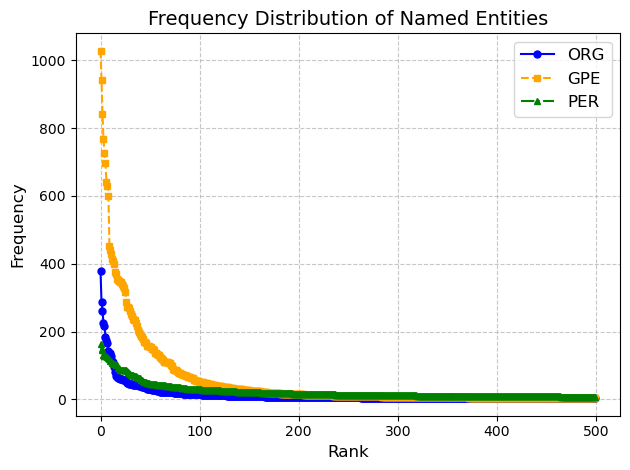

In [ ]:
import matplotlib.pyplot as plt
from nltk import FreqDist

org_freq = Counter([org for sublist in final_df['ORG'] for org in sublist])
gpe_freq = Counter([gpe for sublist in final_df['GPE'] for gpe in sublist])
per_freq = Counter([per for sublist in final_df['PER'] for per in sublist])

org_values = sorted(org_freq.values(), reverse=True)
gpe_values = sorted(gpe_freq.values(), reverse=True)
per_values = sorted(per_freq.values(), reverse=True)

org_values = org_values[:500]
gpe_values = gpe_values[:500]
per_values = per_values[:500]

plt.plot(org_values, label='ORG', color='blue', marker='o', linestyle='-', markersize=5)
plt.plot(gpe_values, label='GPE', color='orange', marker='s', linestyle='--', markersize=5)
plt.plot(per_values, label='PER', color='green', marker='^', linestyle='-.', markersize=5)

plt.title("Frequency Distribution of Named Entities", fontsize=14)
plt.xlabel("Rank", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Select the most common 100 Named Entity

In [ ]:
from nltk import FreqDist

orgs = [org for sublist in final_df['ORG'] for org in sublist]
gpes = [gpe for sublist in final_df['GPE'] for gpe in sublist]
per = [per for sublist in final_df['PER'] for per in sublist]

top_orgs = [org for org, _ in FreqDist(orgs).most_common(100)]
top_gpes = [gpe for gpe, _ in FreqDist(gpes).most_common(100)]
top_per = [per for per, _ in FreqDist(per).most_common(100)]

#### Plot the most common Named Entity

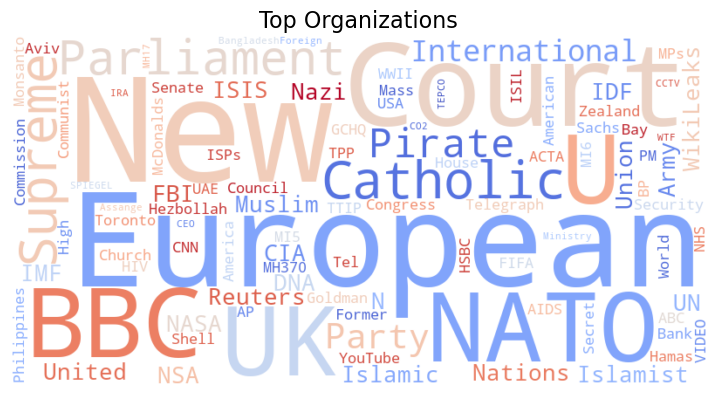

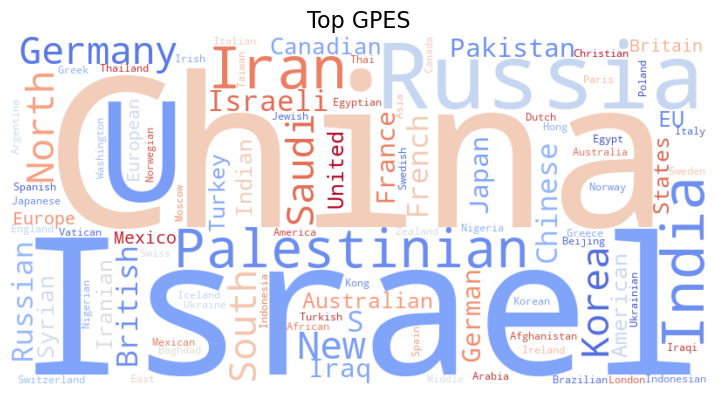

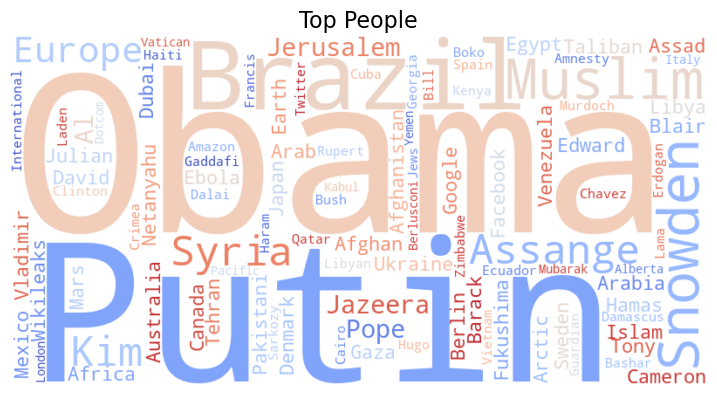

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import wikipedia

titles_orgs = " ".join(top_orgs)
titles_gpes = " ".join(top_gpes)
titles_per = " ".join(top_per)

colormap = 'coolwarm'
common_settings = {
    "background_color": "white",
    "width": 800,
    "height": 400,
    "max_words": 100,
    "colormap": colormap,
    "random_state": 42
}

word_cloud_orgs = WordCloud(**common_settings).generate(titles_orgs)
plt.figure(figsize=(9, 6))
plt.imshow(word_cloud_orgs, interpolation='bilinear')
plt.axis("off")
plt.title("Top Organizations", fontsize=16)
plt.show()

word_cloud_gpes = WordCloud(**common_settings).generate(titles_gpes)
plt.figure(figsize=(9, 6))
plt.imshow(word_cloud_gpes, interpolation='bilinear')
plt.axis("off")
plt.title("Top GPES", fontsize=16)
plt.show()

word_cloud_per = WordCloud(**common_settings).generate(titles_per)
plt.figure(figsize=(9, 6))
plt.imshow(word_cloud_per, interpolation='bilinear')
plt.axis("off")
plt.title("Top People", fontsize=16)
plt.show()

#### Naive_Bayes_Classifier model using Named Entity Recognition features

In [ ]:
def news_features(news, company_entities, gpe_entities, per_entities):
    news_words = set(news)
    features = {}

    for org in top_orgs:
        features[f'Contains_ORG({org})'] = (org in news)
    for gpe in top_gpes:
        features[f'Contains_GPE({gpe})'] = (gpe in news)
    for per in top_per:
        features[f'Contains_PER({per})'] = (per in news)
    return features

featuresets = [
    (news_features(news, org, gpe, per), label)
    for news, org, gpe, per, label in zip(final_df['Cleaned_Hlines'], final_df['ORG'], final_df['GPE'], final_df['PER'], final_df['Label'])
]

import random
random.seed(8)
random.shuffle(featuresets)
train_indices = final_df[(final_df['Date'] >= '2008-08-08') & (final_df['Date'] <= '2014-12-31')].index
test_indices = final_df[(final_df['Date'] >= '2015-01-02') & (final_df['Date'] <= '2016-07-01')].index
train_df = [featuresets[i] for i in train_indices]
test_df = [featuresets[i] for i in test_indices]

classifier = nltk.NaiveBayesClassifier.train(train_df)
classifier.show_most_informative_features(10)

Most Informative Features
Contains_ORG(Foreign Ministry) = True                1 : 0      =      6.7 : 1.0
Contains_ORG(Security Council) = True                1 : 0      =      3.2 : 1.0
      Contains_ORG(CCTV) = True                1 : 0      =      2.0 : 1.0
      Contains_ORG(ACTA) = True                0 : 1      =      2.0 : 1.0
   Contains_ORG(SPIEGEL) = True                0 : 1      =      2.0 : 1.0
      Contains_ORG(GCHQ) = True                1 : 0      =      1.9 : 1.0
     Contains_PER(Cairo) = True                1 : 0      =      1.9 : 1.0
   Contains_PER(Mubarak) = True                1 : 0      =      1.9 : 1.0
Contains_ORG(European Court) = True                0 : 1      =      1.8 : 1.0
Contains_ORG(News International) = True                0 : 1      =      1.8 : 1.0


#### Model evaluation

In [ ]:
from sklearn.metrics import classification_report
y_test = [label for _, label in test_df]
y_pred_l1 = [classifier.classify(features) for features, _ in test_df]
print("Classification Report:\n", classification_report(y_test, y_pred_l1))
print(f"Accuracy: {nltk.classify.accuracy(classifier, test_df):.2f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49       170
           1       0.59      0.60      0.59       208

    accuracy                           0.55       378
   macro avg       0.54      0.54      0.54       378
weighted avg       0.55      0.55      0.55       378

Accuracy: 0.55
